In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
  Change the *DATA_PATH* with your dataset location.

In [ ]:
DATA_PATH = "/content/data_analytics.csv"


data = pd.read_csv(DATA_PATH)
data.head()

,Event Date,App Apple ID,Subscription Name,Standard Subscription Duration,Promotional Offer Name,Promotional Offer ID,Subscription Offer Type,Subscription Offer Duration,Marketing Opt-In Duration,Customer Currency,Proceeds Currency,Device,Country,Subscriber ID,Subscriber ID Reset,Refund,Purchase Date,Units
0,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,NaN,NaN,Free Trial,7 Days,NaN,IDR,IDR,iPhone,ID,223411322456765433,NaN,NaN,NaN,1
1,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,NaN,NaN,Free Trial,7 Days,NaN,USD,USD,iPhone,US,223411322456765434,NaN,NaN,NaN,1
2,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,NaN,NaN,Free Trial,7 Days,NaN,INR,INR,iPhone,IN,223411322456765435,NaN,NaN,NaN,1
3,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,NaN,NaN,Free Trial,7 Days,NaN,GBP,GBP,iPhone,GB,223411322456765437,NaN,NaN,NaN,1
4,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,NaN,NaN,Free Trial,7 Days,NaN,INR,INR,iPhone,IN,223411322456765438,NaN,NaN,NaN,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Event Date                      2380 non-null   object 
 1   App Apple ID                    2380 non-null   int64  
 2   Subscription Name               2380 non-null   object 
 3   Standard Subscription Duration  2380 non-null   object 
 4   Promotional Offer Name          0 non-null      float64
 5   Promotional Offer ID            0 non-null      float64
 6   Subscription Offer Type         1019 non-null   object 
 7   Subscription Offer Duration     1019 non-null   object 
 8   Marketing Opt-In Duration       0 non-null      float64
 9   Customer Currency               2380 non-null   object 
 10  Proceeds Currency               2380 non-null   object 
 11  Device                          2380 non-null   object 
 12  Country                         23

# Dataset preparation
  Handling missing values and converting the date to usable format.

In [ ]:
columns_to_drop = data.isnull().sum().sort_values(ascending = False)
columns_to_drop = columns_to_drop[columns_to_drop > data.shape[0]-10].index
data = data.drop(columns_to_drop, axis=1)

data['Event Date'] = pd.to_datetime(data['Event Date'])

data['Subscription Offer Type'] = data['Subscription Offer Type'].fillna("Subscription")
data.head(10)

,Event Date,App Apple ID,Subscription Name,Standard Subscription Duration,Subscription Offer Type,Subscription Offer Duration,Customer Currency,Proceeds Currency,Device,Country,Subscriber ID,Units
0,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,Free Trial,7 Days,IDR,IDR,iPhone,ID,223411322456765433,1
1,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,Free Trial,7 Days,USD,USD,iPhone,US,223411322456765434,1
2,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,Free Trial,7 Days,INR,INR,iPhone,IN,223411322456765435,1
3,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,Free Trial,7 Days,GBP,GBP,iPhone,GB,223411322456765437,1
4,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,Free Trial,7 Days,INR,INR,iPhone,IN,223411322456765438,1
5,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,Free Trial,7 Days,USD,USD,iPhone,CR,223411322456765439,1
6,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,Free Trial,7 Days,THB,THB,iPhone,TH,223411322456765441,1
7,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,Free Trial,7 Days,TRY,TRY,iPhone,TR,223411322456765442,1
8,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,Free Trial,7 Days,TZS,TZS,iPhone,TZ,223411322456765443,1
9,2019-07-15,1,weekly 9.99 + 7D trial,7 Days,Free Trial,7 Days,QAR,QAR,iPhone,QA,223411322456765445,1


Calculating the number of subscriptions per each week.

In [ ]:
grouped = data.groupby("Subscriber ID")['Event Date'].count()
weekly_subscription = [len(grouped[grouped > x]) for x in range(0, 6)]
weekly_subscription

[1019, 499, 353, 262, 155, 92]

Using the LTV formula to calculate total Lifetime Value

In [ ]:
APPLE_FEE = 0.7
SUBSCRIPTION_PRICE = 9.99
DEV_PROCEEDS = APPLE_FEE*SUBSCRIPTION_PRICE
trial_users = len(data.groupby("Subscriber ID"))

sub_for_formula = np.zeros(5)
sub_for_formula[0] = DEV_PROCEEDS * weekly_subscription[1]/weekly_subscription[0]

for i in range(1, 5):
  sub_for_formula[i] = sub_for_formula[i-1]*weekly_subscription[i]/weekly_subscription[i-1]

LTV = sum(sub_for_formula)

In [ ]:
print("LTV = ", LTV)

LTV =  7.689033020307965


# **LTV ~ 7.7 $**

LTV is fairly low, which is not surprising considering our conversion rate. We may also plot the number of subscriptions per week to show our CEO why we should change our business model.

Text(0, 0.5, 'Number of subscriptions')

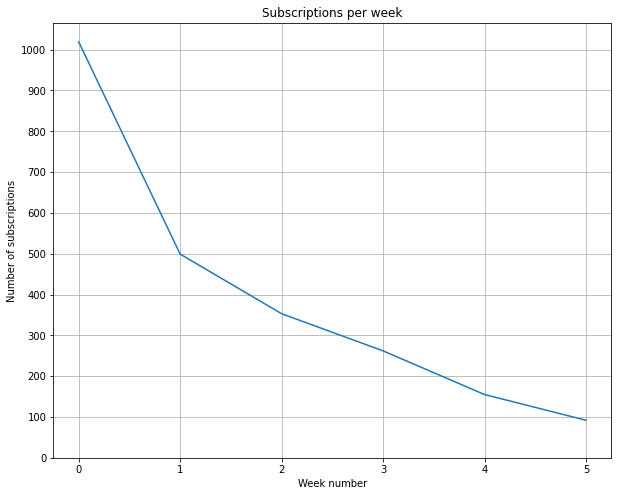

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.grid()
ax.plot([x for x in range(0, 6)], weekly_subscription)

ax.set_yticks(np.arange(0, max(weekly_subscription), 100))

ax.set_title('Subscriptions per week')
ax.set_xlabel('Week number')
ax.set_ylabel('Number of subscriptions')